In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

df = pd.read_csv('MLTempDataset1.csv', parse_dates=['Datetime'])

In [2]:
df.columns

Index(['Unnamed: 0', 'Datetime', 'Hourly_Temp'], dtype='object')

In [3]:
df.describe()

,Unnamed: 0,Hourly_Temp
count,7056.000000,7056.000000
mean,3527.500000,21.867468
std,2037.036082,6.737313
min,0.000000,5.350000
25%,1763.750000,18.400000
50%,3527.500000,24.033000
75%,5291.250000,26.333000
max,7055.000000,36.500000


In [4]:
df=df.iloc[:,1:]

In [5]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Datetime'][0]

Timestamp('2022-01-04 00:00:00')

In [6]:
df = df.set_index(['Datetime'])

In [7]:
def IQR(data,col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3-q1
    return iqr,q1,q3

for i in df.columns:
    iqr,q1,q3 = IQR(df,i)
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    df = df[(df[i] > lower) & (df[i] < upper)]

def normalize(data):
    return (data - data.min()) / (data.max() - data.min())

for col in df.columns:
    df[col] = normalize(df[col])

In [8]:
df.sort_index(inplace=True)

In [9]:
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_ss = scaler.fit_transform(df)

In [10]:
columns = df.columns
df.describe()

,Hourly_Temp
count,7044.000000
mean,0.512340
std,0.224071
min,0.000000
25%,0.398406
50%,0.583740
75%,0.660534
max,1.000000


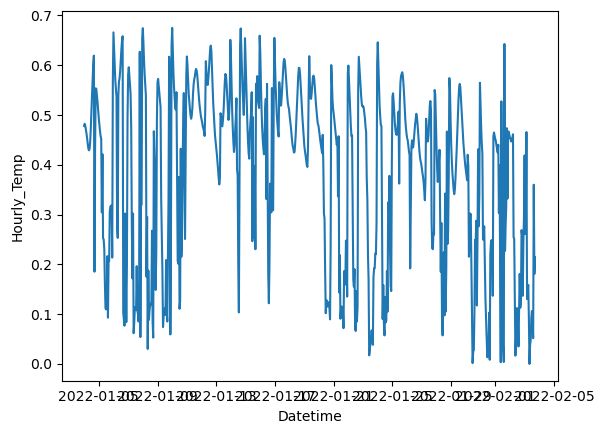

In [11]:
plt.xlabel('Datetime')
plt.ylabel("Hourly_Temp")
plt.plot(df[0:365*2])

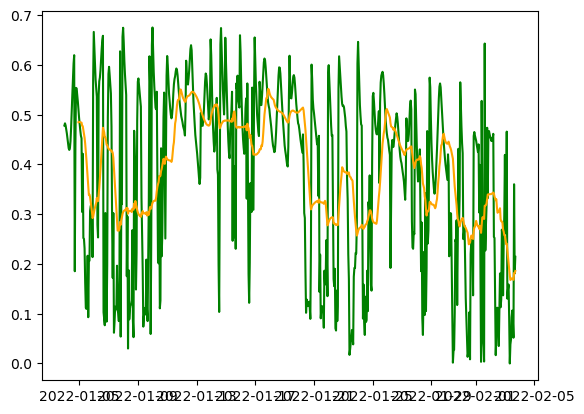

In [12]:
rol_mean = df.rolling(window=24).mean()
rol_sd = df.rolling(window=24).std()

plt.plot(df[0:365*2],c="green")
plt.plot(rol_mean[0:365*2],c="orange")

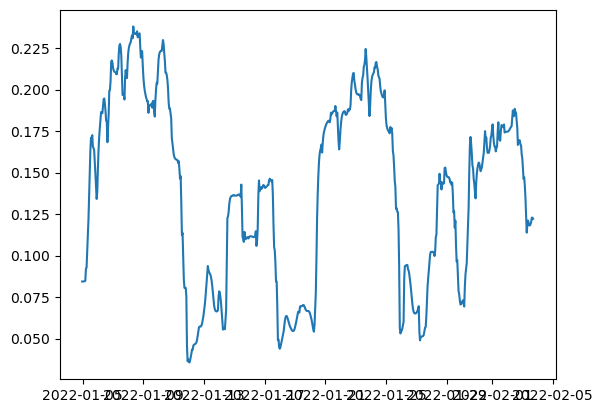

In [13]:
plt.plot(rol_sd[0:365*2])

In [14]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(df["Hourly_Temp"])
print(adftest)

(-9.364559335921362, 7.662093176698771e-16, 24, 7019, {'1%': -3.4312819978801934, '5%': -2.8619518683619543, '10%': -2.566989233537464}, -14140.978714353325)


In [15]:
df_new = df["Hourly_Temp"]-df["Hourly_Temp"].shift(2)

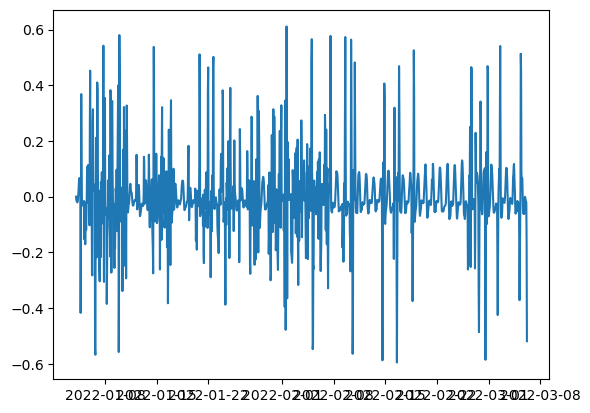

In [16]:
plt.plot(df_new[:365*4])

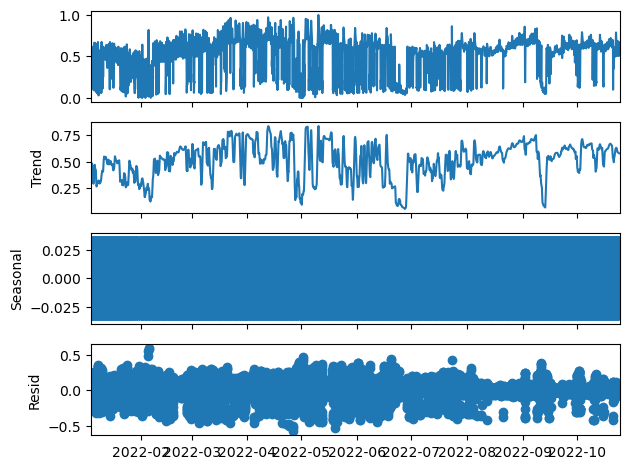

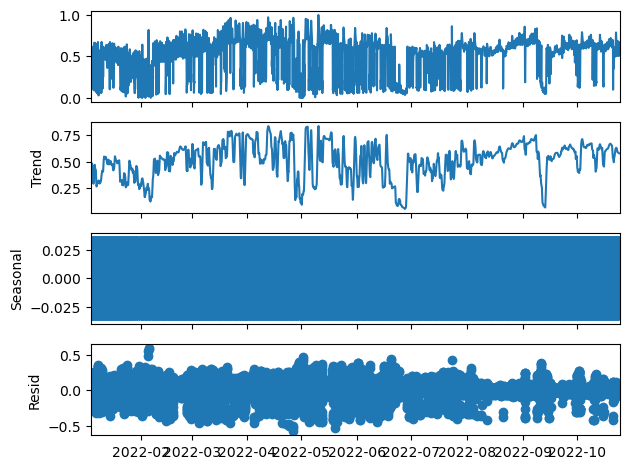

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='additive', period=24)
result.plot()

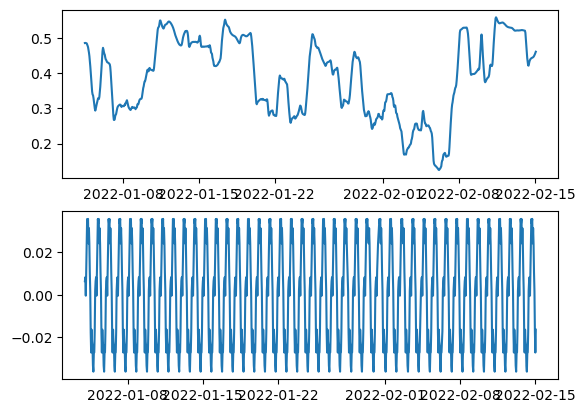

In [18]:
trend=result.trend
season=result.seasonal

plt.subplot(211)
plt.plot(trend[:1000])
plt.subplot(212)
plt.plot(season[:1000])

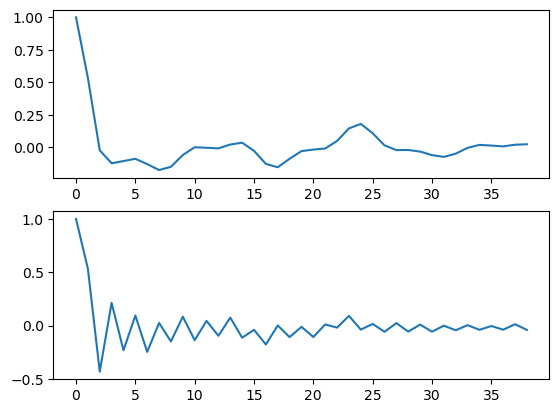

In [19]:
from statsmodels.tsa.stattools import acf, pacf

d_acf = acf(df_new.dropna())
d_pacf = pacf(df_new.dropna())

plt.subplot(211)
plt.plot(d_acf)
plt.subplot(212)
plt.plot(d_pacf)

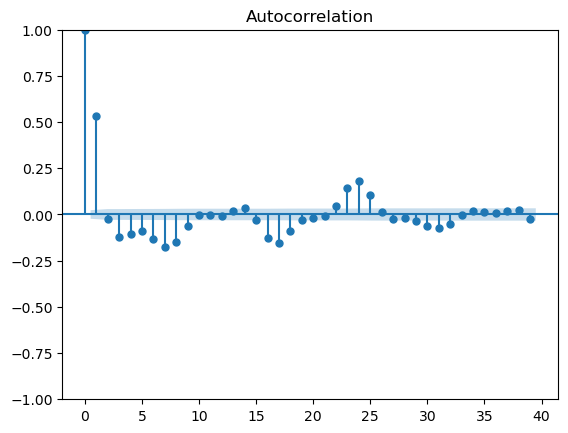

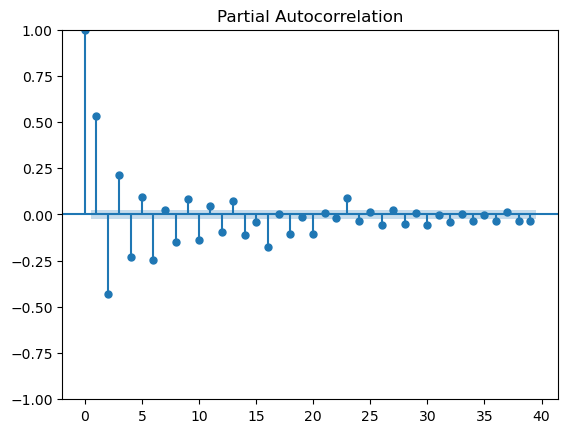

In [20]:
df_diff = df['Hourly_Temp'].diff(2).dropna()  # Diff with lag 2
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_diff)
plot_pacf(df_diff)
plt.show()

In [21]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
h=sm.tsa.arima.ARIMA(df,order=(1,0,3))
model=h.fit()

c:\Users\sreea\anaconda3\envs\clean\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sreea\anaconda3\envs\clean\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sreea\anaconda3\envs\clean\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


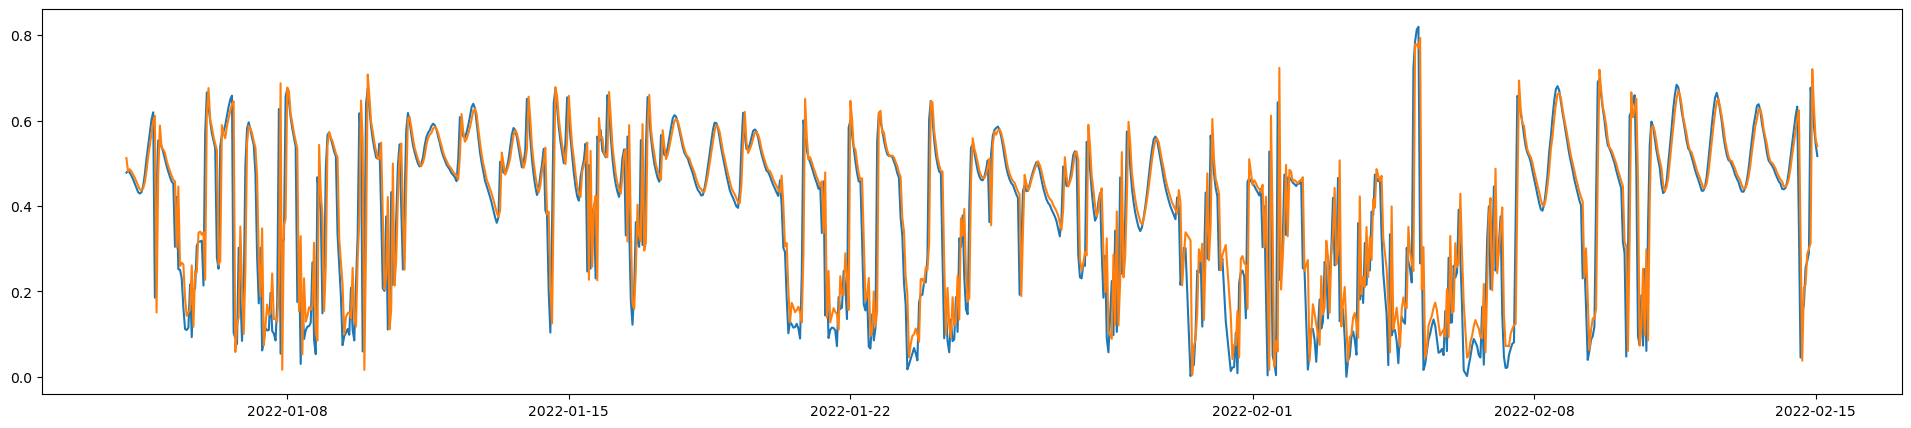

In [22]:
plt.figure(figsize=(24,5))
plt.plot(df[:1000])
plt.plot(model.predict()[:1000])
plt.show()


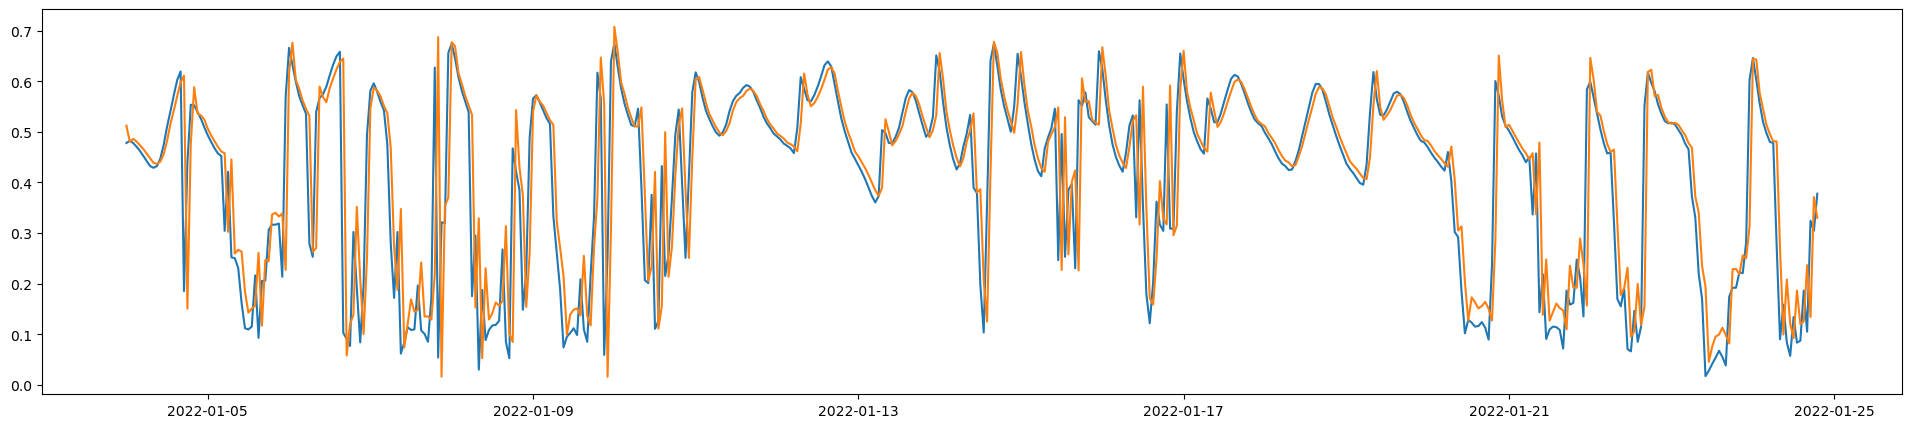

In [23]:
plt.figure(figsize=(24,5))
plt.plot(df[:500])
plt.plot(model.predict()[:500])
plt.show()